In [170]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns
from functools import reduce
from sklearn.preprocessing import MinMaxScaler
from sklearn import cluster

In [171]:
#As always we have to specify to jupyter that we want to see all the outputs.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 1000
pd.options.display.max_columns= 1000

In [172]:
%%capture

#the %%capture makes sure not the whole of last assignment is printed here

#import Dataframes as df


#This imports dataframes from other code.
%run "Dataframes.ipynb"


In [173]:
#framedict = df.framedict
framedict.keys()

dict_keys(['Deaths', 'Demographics', 'Age', 'Hospitals', 'Names'])

In [174]:
hosp_frame = framedict['Hospitals']


In [175]:
india_shp_MASTERS = './maps-master/maps-master/Districts/Census_2011/2011_Dist.shp'

In [176]:
india_s_masters = gpd.read_file(india_shp_MASTERS)
india_s_masters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DISTRICT    641 non-null    object  
 1   ST_NM       641 non-null    object  
 2   ST_CEN_CD   641 non-null    int64   
 3   DT_CEN_CD   641 non-null    int64   
 4   censuscode  641 non-null    int64   
 5   geometry    641 non-null    geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 30.2+ KB


In [177]:
india_s_masters.head()

missingcheck(india_s_masters['censuscode'],641 )

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


0 values are missing.


[]

In [178]:
# We can merge the dataframes on the censuscodes. 
# These codes represent the numbers that were given to the districts
type(india_s_masters["censuscode"])
type(hosp_frame["censuscode"])

pandas.core.series.Series

pandas.core.series.Series

In [179]:
#df.missingcheck(india_s_masters['DT_CEN_CD'],640)

<AxesSubplot:>

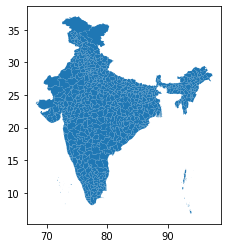

In [180]:
india_s_masters.plot()

In [181]:
##for joining two files
india_joined = india_s_masters.merge(champion,on='censuscode')
india_joined.head(2)

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Districtname,pc11_state_name,State id,Literacy,population density,slum population,Urban population share,population,pc11_tot_area,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average_age,total_cases,total_deaths,deaths per 100.000,cases per 100.000,population density2
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",adilabad,andhra pradesh,28.0,1483347.0,184.00331,303312.000977,0.277341,2741239.0,14897.7700,14.0,1566.7123,85.52240,27.308952,0.0,0.0,0.000000,0.000000,184.003311
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",agra,uttar pradesh,9.0,2680510.0,1080.82780,533554.000000,0.458087,4418797.0,4088.3452,16.0,1052.2804,107.98638,25.197544,11831.0,182.0,4.118768,267.742555,1080.827764


In [182]:
india_joined.loc[india_joined['ST_NM'] == 'NCT of Delhi']

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Districtname,pc11_state_name,State id,Literacy,population density,slum population,Urban population share,population,pc11_tot_area,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average_age,total_cases,total_deaths,deaths per 100.000,cases per 100.000,population density2
397,North West,NCT of Delhi,7,1,90,"POLYGON ((77.17093 28.66833, 77.16689 28.67303...",delhi (north west),NCT of Delhi,NaN,2707855.0,10354.4790,376234.050781,0.941488,3656539.0,353.13599,NaN,NaN,NaN,28.811548,750156.0,11436.0,312.754766,20515.465581,10354.478455
518,South,NCT of Delhi,7,9,98,"POLYGON ((77.26455 28.60747, 77.26558 28.60738...",delhi (north east),NCT of Delhi,NaN,2078402.0,20443.7970,319397.919907,0.995537,2731929.0,133.63120,NaN,NaN,NaN,27.756417,750156.0,11436.0,418.605315,27458.839523,20443.796060
523,South West,NCT of Delhi,7,8,97,"POLYGON ((77.18253 28.64817, 77.18380 28.64638...",delhi (south west),NCT of Delhi,NaN,1787689.0,8243.7803,259683.193726,0.937340,2292958.0,278.14401,NaN,NaN,NaN,27.868524,750156.0,11436.0,498.744417,32715.645031,8243.779904


In [183]:
df = pd.DataFrame(np.random.randint(0,100,size=(641, 1)))

In [184]:
india_s_masters['random'] = df

In [185]:
india_s_masters.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,random
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",52
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",27
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",66
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",9
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",0


In [186]:
# We drop the row with the data that is unclear
india_s_masters = india_s_masters[india_s_masters['censuscode'] != 0]

In [187]:
columns_to_plot = champion.columns.values.tolist()
type(columns_to_plot)

for index,value in enumerate(columns_to_plot):
    print(index,value)


list

0 censuscode
1 Districtname
2 pc11_state_name
3 State id
4 Literacy
5 population density
6 slum population
7 Urban population share
8 population
9 pc11_tot_area
10 Beds (IC)
11 Beds (total)
12 Care facilities (hospitals/clinics)
13 average_age
14 total_cases
15 total_deaths
16 deaths per 100.000
17 cases per 100.000
18 population density2


In [188]:
# This code removes unneeded variables
if len(columns_to_plot) != 14:
    columns_to_plot = columns_to_plot[4:10] + columns_to_plot[10:16]
    len(columns_to_plot)
    for index,value in enumerate(columns_to_plot):
        print(index,value)



12

0 Literacy
1 population density
2 slum population
3 Urban population share
4 population
5 pc11_tot_area
6 Beds (IC)
7 Beds (total)
8 Care facilities (hospitals/clinics)
9 average_age
10 total_cases
11 total_deaths


In [189]:
columns_to_plot[1]

'population density'

In [190]:
india_joined

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Districtname,pc11_state_name,State id,Literacy,population density,slum population,Urban population share,population,pc11_tot_area,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average_age,total_cases,total_deaths,deaths per 100.000,cases per 100.000,population density2
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",adilabad,andhra pradesh,28.0,1483347.0,184.00331,303312.000977,0.277341,2741239.0,14897.770000,14.0,1566.71230,85.522400,27.308952,0.000000,0.000000,0.000000,0.000000,184.003311
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",agra,uttar pradesh,9.0,2680510.0,1080.82780,533554.000000,0.458087,4418797.0,4088.345200,16.0,1052.28040,107.986380,25.197544,11831.000000,182.000000,4.118768,267.742555,1080.827764
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",ahmadabad,NaN,NaN,5435760.0,912.97119,257180.995117,0.840429,7214225.0,7901.919400,NaN,NaN,NaN,29.193032,87181.566949,2489.818663,34.512628,1208.467534,912.971221
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",ahmadnagar,maharashtra,27.0,3151890.0,264.20233,104483.000000,0.200877,4543159.0,17195.756000,16.0,1405.50210,125.941830,28.599699,119009.000000,1323.000000,29.120707,2619.520910,264.202342
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",aizawl,mizoram,15.0,340595.0,1795.10770,78561.000000,0.786278,400309.0,223.000000,5.0,935.88641,57.488644,27.148128,3112.000000,11.000000,2.747877,777.399459,1795.107623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Tapi,Gujarat,24,26,493,"POLYGON ((74.08573 21.55513, 74.08672 21.55515...",tapi,NaN,NaN,490036.0,265.48596,12919.000000,0.098494,807022.0,3039.791700,NaN,NaN,NaN,29.677567,1323.000000,8.000000,0.991299,163.936051,265.485954
602,Nicobar,Andaman & Nicobar Island,35,1,638,"MULTIPOLYGON (((93.84861 7.24051, 93.84870 7.2...",nicobars,andaman nicobar islands,35.0,25332.0,527.01520,0.000000,0.000000,36842.0,69.906898,0.0,218.62912,12.533057,NaN,NaN,NaN,NaN,NaN,527.015231
603,South Andaman,Andaman & Nicobar Island,35,3,640,"MULTIPOLYGON (((92.69758 12.23961, 92.69778 12...",south andaman,andaman nicobar islands,35.0,190266.0,634.09247,14172.000000,0.591021,238142.0,375.563510,10.0,766.36798,25.336796,NaN,0.000000,0.000000,0.000000,0.000000,634.092487
604,North & Middle Andaman,Andaman & Nicobar Island,35,2,639,"MULTIPOLYGON (((92.89905 12.91512, 92.89905 12...",north middle andaman,andaman nicobar islands,35.0,78683.0,258.90808,0.000000,0.025957,105597.0,407.855190,0.0,444.58643,20.856722,NaN,0.000000,0.000000,0.000000,0.000000,258.908070


Text(0.5, 1.0, 'Literacy')

Text(0.5, 1.0, 'population density')

Text(0.5, 1.0, 'slum population')

Text(0.5, 1.0, 'Urban population share')

Text(0.5, 1.0, 'population')

Text(0.5, 1.0, 'pc11_tot_area')

Text(0.5, 1.0, 'Beds (IC)')

Text(0.5, 1.0, 'Beds (total)')

Text(0.5, 1.0, 'Care facilities (hospitals/clinics)')

Text(0.5, 1.0, 'average_age')

Text(0.5, 1.0, 'total_cases')

Text(0.5, 1.0, 'total_deaths')

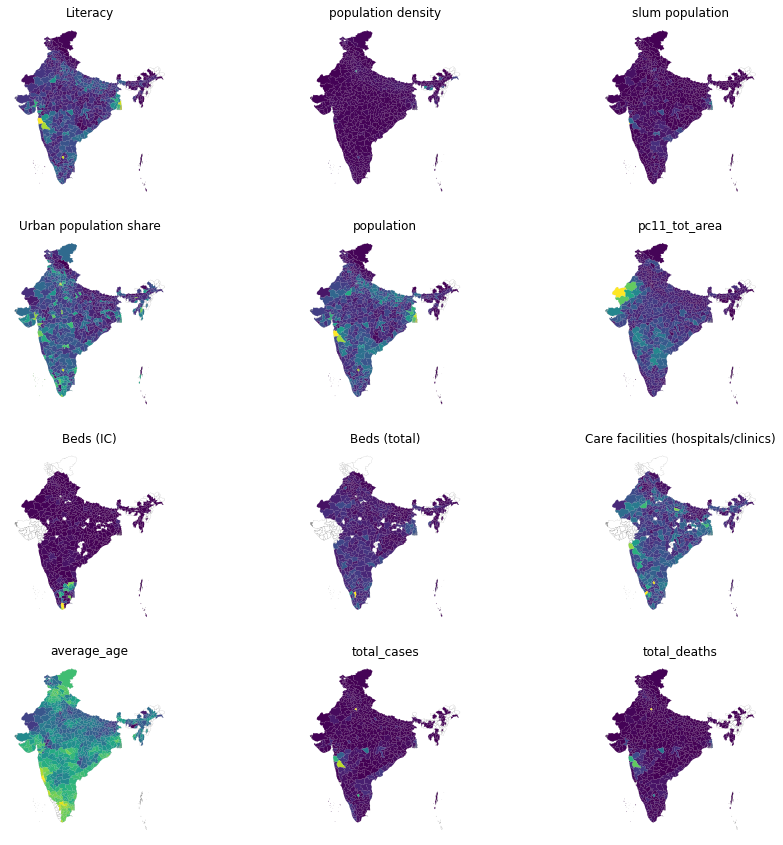

In [191]:
f, axs = plt.subplots(3,4, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axs[i]
    plot = india_s_masters.plot(ax = ax, linewidth=0.1, alpha = 1, color = 'white', edgecolor="grey")
    plot = india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 1)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [240]:
column = ['population density', 'cases per 100.000','deaths per 100.000']
len (list(range(1,k+1,1)))

100

,censuscode,cases per 100.000,deaths per 100.000
0,532,0.000000,0.000000
1,146,267.742555,4.118768
2,474,1208.467534,34.512628
3,522,2619.520910,29.120707
4,283,777.399459,2.747877
...,...,...,...
601,493,163.936051,0.991299
602,638,NaN,NaN
603,640,0.000000,0.000000
604,639,0.000000,0.000000


C:\Users\danie\AppData\Local\Temp/ipykernel_16932/2099848501.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection['perc cases'] = pd.qcut(selection['cases per 100.000'], k, labels = klist)
C:\Users\danie\AppData\Local\Temp/ipykernel_16932/2099848501.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selection['perc deaths'] = pd.qcut(selection['deaths per 100.000'], k, labels = klist)


<AxesSubplot:xlabel='censuscode', ylabel='deaths per 100.000_x'>

<AxesSubplot:xlabel='censuscode', ylabel='deaths per 100.000_x'>

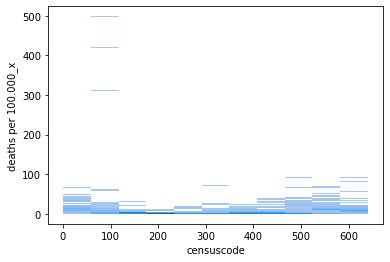

In [288]:
selection = india_joined[['censuscode','cases per 100.000','deaths per 100.000']]
#india_joined
#for some reason, this k cant be bigger than 20
k = 10
klist = list(range(1,k+1,1))
selection
selection['perc cases'] = pd.qcut(selection['cases per 100.000'], k, labels = klist)
selection['perc deaths'] = pd.qcut(selection['deaths per 100.000'], k, labels = klist)


test = pd.merge(india_joined, selection, how = 'right', on = 'censuscode')

#these hist plots show crazy outliers
sns.histplot(data = test[['deaths per 100.000_x','censuscode']].sort_values(by = 'deaths per 100.000_x', ascending = False), x=test['censuscode'],y=test['deaths per 100.000_x'])
sns.histplot(data = test[['cases per 100.000_x','censuscode']].sort_values(by = 'cases per 100.000_x', ascending = False), x=test['censuscode'],y=test['deaths per 100.000_x'])


selection = selection[selection['deaths per 100.000'] < 200]
selection = selection[selection['cases per 100.000'] < 200]

#test[['deaths per 100.000_x','censuscode']].sort_values(by = 'deaths per 100.000_x', ascending = False)

Text(0.5, 1.0, 'perc cases')

Text(0.5, 1.0, 'perc deaths')

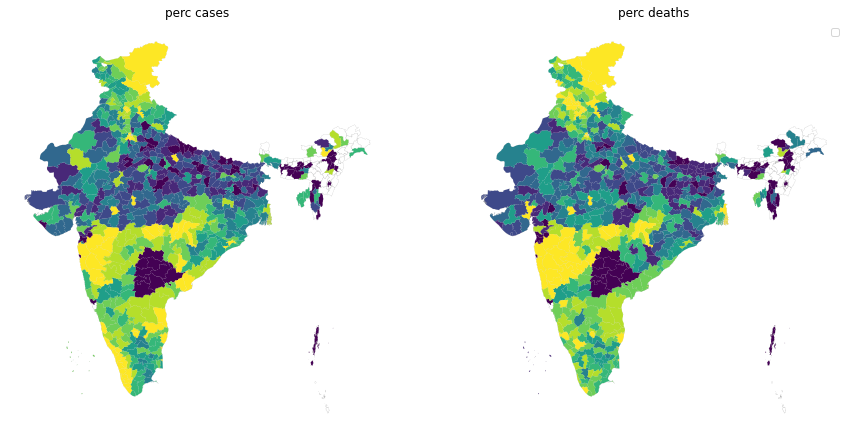

In [293]:
columns_to_plot = ['perc cases','perc deaths']

f, axs = plt.subplots(1,2, figsize=(15,15))
axs = axs.flatten()


for i, col in enumerate(columns_to_plot):
    ax = axs[i]
    plot = india_s_masters.plot(ax = ax, linewidth=0.1, alpha = 1, color = 'white', edgecolor="grey")
    plot = test.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 1)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.legend(labels=klist)
plt.show()

<AxesSubplot:>

Text(0.5, 1.0, 'population density')

<AxesSubplot:>

Text(0.5, 1.0, 'cases per 100.000')

<AxesSubplot:>

Text(0.5, 1.0, 'deaths per 100.000')

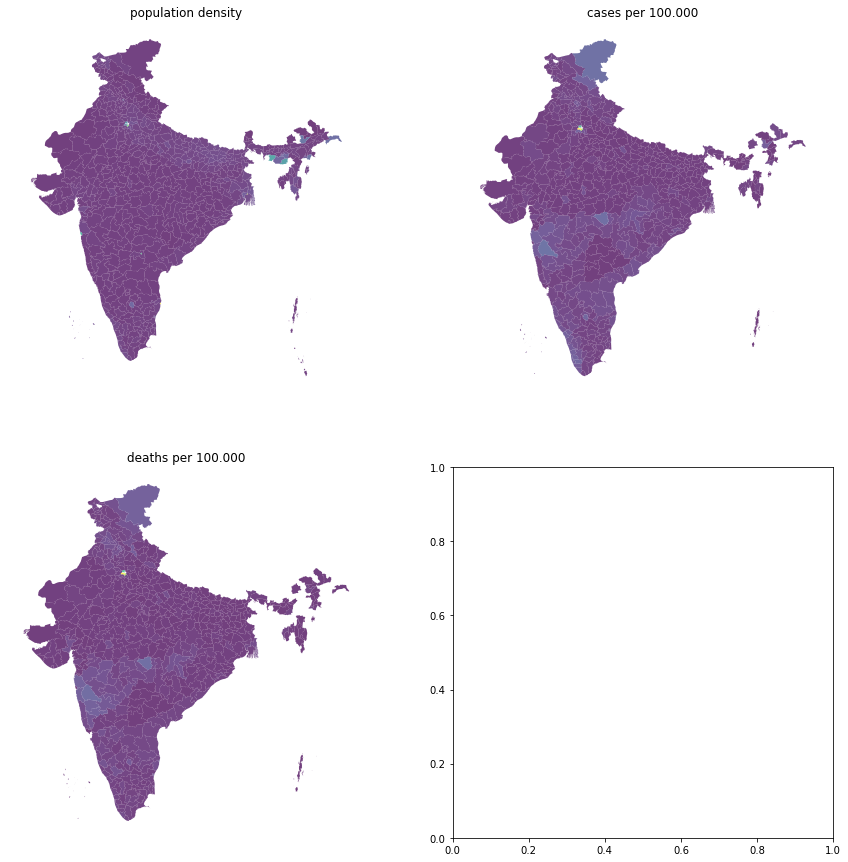

In [193]:
f, axs = plt.subplots(2,2, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(column):
    ax = axs[i]
    india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 0.75)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [194]:
india_joined.sort_values("pc11_tot_area", ascending = True).head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Districtname,pc11_state_name,State id,Literacy,population density,slum population,Urban population share,population,pc11_tot_area,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average_age,total_cases,total_deaths,deaths per 100.000,cases per 100.000,population density2
160,East Garo Hills,Meghalaya,17,2,294,"POLYGON ((91.03234 25.88749, 91.03220 25.87930...",east garo hills,meghalaya,17.0,192147.0,12955.0530,4891.0,0.139005,317917.0,24.540001,0.0,239.60149,15.806218,21.918252,459.0,3.0,0.943643,144.377306,12955.052447
105,Changlang,Arunanchal Pradesh,12,9,253,"POLYGON ((96.90034 27.61545, 96.89734 27.61197...",changlang,arunachal pradesh,12.0,73174.0,5274.8716,0.0,0.129721,148226.0,28.100401,0.0,352.91516,22.217564,22.816780,1285.0,4.0,2.698582,866.919434,5274.871344
409,Papum Pare,Arunanchal Pradesh,12,4,248,"POLYGON ((93.51798 27.64978, 93.55896 27.60877...",papum pare,arunachal pradesh,12.0,121048.0,6233.8218,0.0,0.549138,176573.0,28.325001,6.0,226.00000,60.207817,22.630328,6798.0,29.0,16.423802,3849.965737,6233.821492
605,Lakshadweep,Lakshadweep,31,1,587,"MULTIPOLYGON (((74.10131 11.20431, 74.09908 11...",lakshadweep,lakshadweep,31.0,52553.0,2216.8774,0.0,0.780668,64473.0,29.082800,NaN,NaN,NaN,NaN,834.0,1.0,1.551037,1293.564748,2216.877330
600,Yanam,Puducherry,34,1,634,"POLYGON ((82.22052 16.73898, 82.22431 16.73626...",yanam,puducherry,34.0,39274.0,1854.2000,31250.0,1.000000,55626.0,30.000000,5.0,80.00000,1.000000,NaN,2257.0,46.0,82.695143,4057.455147,1854.200000


In [195]:
india_joined.loc(axis=0)[563]['population density']

46.695461

In [196]:
india_joined.loc(axis=0)[563]

DISTRICT                Uttarkashi
ST_NM                  Uttarakhand
ST_CEN_CD                        5
DT_CEN_CD                        1
censuscode                      56
                          ...     
total_cases                 3889.0
total_deaths                  17.0
deaths per 100.000        5.150173
cases per 100.000      1178.177808
population density2      46.695461
Name: 563, Length: 24, dtype: object

In [197]:
# Creating a scaler so that all variables are on the same scale
scaler = MinMaxScaler()

In [198]:
print(scaler.fit(india_joined[columns_to_plot]))

MinMaxScaler()


In [199]:
#creating Dataframe with scaled data
india_scaled = (scaler.transform(india_joined[columns_to_plot]))

In [200]:
# Renaming the column headers
india_scaled = pd.DataFrame(india_scaled, columns= india_joined[columns_to_plot].columns)
india_scaled

,Literacy,population density,slum population,Urban population share,population,pc11_tot_area,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average_age,total_cases,total_deaths
0,0.178116,0.006800,0.077467,0.277341,0.245696,0.393887,0.015368,0.134096,0.231546,0.541872,0.000000,0.000000
1,0.324017,0.040580,0.136271,0.458087,0.397806,0.107621,0.017563,0.088494,0.293085,0.391297,0.015771,0.015915
2,0.659806,0.034257,0.065685,0.840429,0.651277,0.208616,NaN,NaN,NaN,0.676235,0.116218,0.217718
3,0.381466,0.009821,0.026685,0.200877,0.409082,0.454744,0.017563,0.119805,0.342273,0.633922,0.158646,0.115687
4,0.038847,0.067484,0.020065,0.786278,0.033435,0.005256,0.005488,0.078176,0.154748,0.530403,0.004148,0.000962
...,...,...,...,...,...,...,...,...,...,...,...,...
601,0.057059,0.009869,0.003300,0.098494,0.070313,0.079853,NaN,NaN,NaN,0.710790,0.001764,0.000700
602,0.000425,0.019720,0.000000,0.000000,0.000479,0.001201,0.000000,0.014594,0.031594,NaN,NaN,NaN
603,0.020526,0.023753,0.003620,0.591021,0.018731,0.009296,0.010977,0.063149,0.066670,NaN,0.000000,0.000000
604,0.006927,0.009622,0.000000,0.025957,0.006713,0.010151,0.000000,0.034624,0.054397,NaN,0.000000,0.000000


In [201]:
# Replacing the values of the variables with the scaled data
india_joined[columns_to_plot] = india_scaled[columns_to_plot]

In [202]:
india_joined

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,Districtname,pc11_state_name,State id,Literacy,population density,slum population,Urban population share,population,pc11_tot_area,Beds (IC),Beds (total),Care facilities (hospitals/clinics),average_age,total_cases,total_deaths,deaths per 100.000,cases per 100.000,population density2
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",adilabad,andhra pradesh,28.0,0.178116,0.006800,0.077467,0.277341,0.245696,0.393887,0.015368,0.134096,0.231546,0.541872,0.000000,0.000000,0.000000,0.000000,184.003311
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",agra,uttar pradesh,9.0,0.324017,0.040580,0.136271,0.458087,0.397806,0.107621,0.017563,0.088494,0.293085,0.391297,0.015771,0.015915,4.118768,267.742555,1080.827764
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",ahmadabad,NaN,NaN,0.659806,0.034257,0.065685,0.840429,0.651277,0.208616,NaN,NaN,NaN,0.676235,0.116218,0.217718,34.512628,1208.467534,912.971221
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",ahmadnagar,maharashtra,27.0,0.381466,0.009821,0.026685,0.200877,0.409082,0.454744,0.017563,0.119805,0.342273,0.633922,0.158646,0.115687,29.120707,2619.520910,264.202342
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",aizawl,mizoram,15.0,0.038847,0.067484,0.020065,0.786278,0.033435,0.005256,0.005488,0.078176,0.154748,0.530403,0.004148,0.000962,2.747877,777.399459,1795.107623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Tapi,Gujarat,24,26,493,"POLYGON ((74.08573 21.55513, 74.08672 21.55515...",tapi,NaN,NaN,0.057059,0.009869,0.003300,0.098494,0.070313,0.079853,NaN,NaN,NaN,0.710790,0.001764,0.000700,0.991299,163.936051,265.485954
602,Nicobar,Andaman & Nicobar Island,35,1,638,"MULTIPOLYGON (((93.84861 7.24051, 93.84870 7.2...",nicobars,andaman nicobar islands,35.0,0.000425,0.019720,0.000000,0.000000,0.000479,0.001201,0.000000,0.014594,0.031594,NaN,NaN,NaN,NaN,NaN,527.015231
603,South Andaman,Andaman & Nicobar Island,35,3,640,"MULTIPOLYGON (((92.69758 12.23961, 92.69778 12...",south andaman,andaman nicobar islands,35.0,0.020526,0.023753,0.003620,0.591021,0.018731,0.009296,0.010977,0.063149,0.066670,NaN,0.000000,0.000000,0.000000,0.000000,634.092487
604,North & Middle Andaman,Andaman & Nicobar Island,35,2,639,"MULTIPOLYGON (((92.89905 12.91512, 92.89905 12...",north middle andaman,andaman nicobar islands,35.0,0.006927,0.009622,0.000000,0.025957,0.006713,0.010151,0.000000,0.034624,0.054397,NaN,0.000000,0.000000,0.000000,0.000000,258.908070


In [203]:
km_list1 = ['deaths per 100.000', 'cases per 100.000', 'Urban population share', 'slum population', 'average_age', 'Literacy']
india_joined[km_list1]

,deaths per 100.000,cases per 100.000,Urban population share,slum population,average_age,Literacy
0,0.000000,0.000000,0.277341,0.077467,0.541872,0.178116
1,4.118768,267.742555,0.458087,0.136271,0.391297,0.324017
2,34.512628,1208.467534,0.840429,0.065685,0.676235,0.659806
3,29.120707,2619.520910,0.200877,0.026685,0.633922,0.381466
4,2.747877,777.399459,0.786278,0.020065,0.530403,0.038847
...,...,...,...,...,...,...
601,0.991299,163.936051,0.098494,0.003300,0.710790,0.057059
602,NaN,NaN,0.000000,0.000000,NaN,0.000425
603,0.000000,0.000000,0.591021,0.003620,NaN,0.020526
604,0.000000,0.000000,0.025957,0.000000,NaN,0.006927


In [204]:
india_jonko = india_joined[km_list1]
india_jonko = gpd.GeoDataFrame(india_jonko)


<AxesSubplot:>

Text(0.5, 1.0, 'deaths per 100.000')

<AxesSubplot:>

Text(0.5, 1.0, 'cases per 100.000')

<AxesSubplot:>

Text(0.5, 1.0, 'Urban population share')

<AxesSubplot:>

Text(0.5, 1.0, 'slum population')

<AxesSubplot:>

Text(0.5, 1.0, 'average_age')

<AxesSubplot:>

Text(0.5, 1.0, 'Literacy')

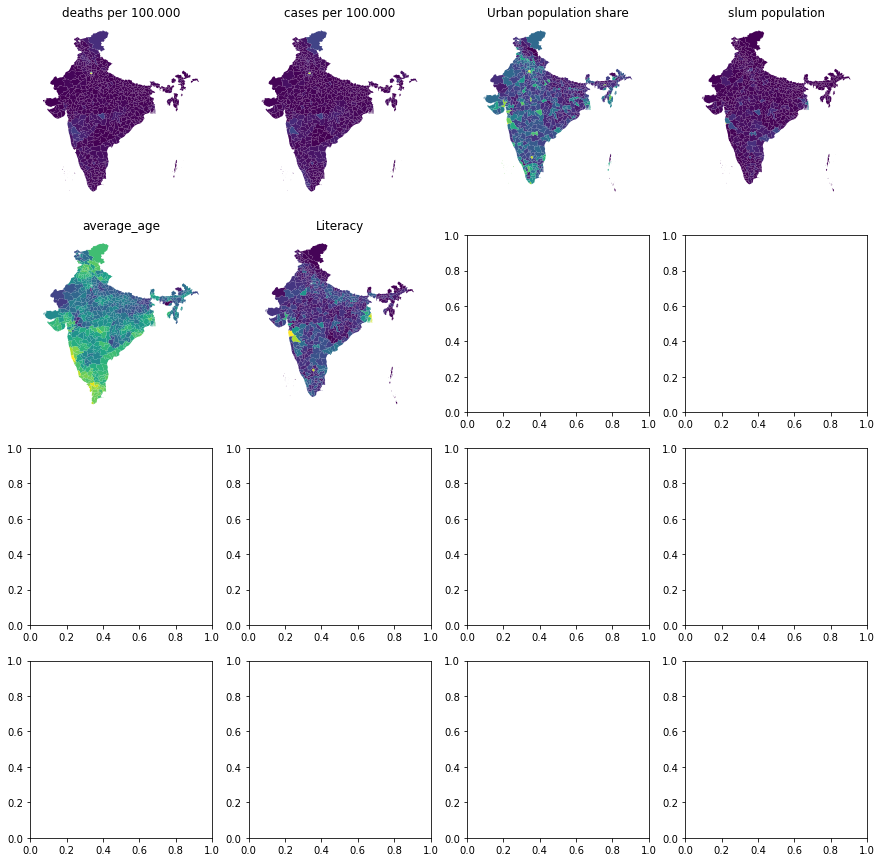

In [205]:
f, axs = plt.subplots(4,4, figsize=(15,15))
axs = axs.flatten()

cols = india_jonko.columns.values.tolist()

for i, col in enumerate(cols):
    ax = axs[i]
    india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 1)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [206]:
# Analysing how many clusters we need using the elbow method
# This method uses the point where the SSE does not decrease that much anaymore
# https://realpython.com/k-means-clustering-python/
from kneed import KneeLocator
from sklearn.preprocessing import StandardScaler

ModuleNotFoundError: No module named 'kneed'

In [ ]:

sse = []
for k in range(1, 11):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(india_joined[km_list1])
    sse.append(kmeans.inertia_)
    
sse

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
# The graph is not very clear so we use a Kneelocater (knik)
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

We choose to use 3 clusters for our further analyses

In [ ]:
#Setting up multiple clusters
kmeans_3 = cluster.KMeans(n_clusters=3)
np.random.seed(1234)
kmeanscls1 = kmeans_3.fit(india_joined[km_list1])

In [ ]:
kmeans_5 = cluster.KMeans(n_clusters=5)
np.random.seed(1234)
kmeanscls2 = kmeans_5.fit(india_joined[km_list1])

In [ ]:
kmeans_7 = cluster.KMeans(n_clusters=7)
np.random.seed(1234)
kmeanscls3 = kmeans_7.fit(india_joined[km_list1])

In [ ]:
kmeans_9 = cluster.KMeans(n_clusters=9)
np.random.seed(1234)
kmeanscls4 = kmeans_9.fit(india_joined[km_list1])

In [ ]:
india_joined['kmeans_3'] = kmeanscls1.labels_
india_joined['kmeans_5'] = kmeanscls2.labels_
india_joined['kmeans_7'] = kmeanscls3.labels_
india_joined['kmeans_9'] = kmeanscls4.labels_

In [ ]:
kmes = ['kmeans_3','kmeans_5','kmeans_7','kmeans_9']

In [ ]:
kme_urb = india_joined[km_list1]
kme_urb

In [ ]:
kme_urb['kmeans_3'] = kmeanscls1.labels_
kme_urb

In [ ]:
size_of_clusters = kme_urb.groupby('kmeans_3').size()
size_of_clusters

In [ ]:
kme_urb = kme_urb.set_index('kmeans_3')
kme_urb.head()

In [ ]:
kme_urb = kme_urb.stack()
kme_urb.head(100)

In [ ]:
kme_urb = kme_urb.reset_index()
kme_urb.head()

In [ ]:
kme_urb = kme_urb.rename({'level_1': 'Characteristics', 0:'Values'}, axis =1)
kme_urb.head()

In [ ]:
facets = sns.FacetGrid(data=kme_urb, row='Characteristics', hue='kmeans_3', \
                  sharey=False, sharex=False, aspect=3)
_ = facets.map(sns.kdeplot, 'Values', shade= True).add_legend()

In [ ]:
f, axs = plt.subplots(2,2, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(kmes):
    ax = axs[i]
    india_joined.plot(column=col, categorical=True, legend=True, linewidth=1, ax=ax)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()
